In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [33]:
tumors = ['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'DLBC', 'ESCA', 'GBM', 'HNSC', 'KICH', 'KIRC', 'KIRP', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD', 'READ', 'SARC', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC', 'UCS', 'UVM']
oncomergeSummary ={}
for tumor in tumors:
  tmp1 = pd.read_csv("/content/drive/MyDrive/output/" + tumor + "/pq_mff/oncoMerge_summaryMatrix.csv", index_col=0)
  tmp1 = tmp1[tmp1.index > 1000000000]
  oncomergeSummary[tumor] = tmp1
  oncomergeSummary[tumor]['Pathway_Type'] = oncomergeSummary[tumor]["Pathway_Name"].astype(str).str[0]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# somatically mutated pathway length
with PdfPages('SomMut_Pathway_Length.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    fig, ax = plt.subplots()
    sns.violinplot(tmp1["Mutated_Pathway_Length"])
    ax.set_title(tumor)
    pdf_pages.savefig( fig )


In [ ]:
# somatically mutated pathway length less than 200
with PdfPages('SomMut_Pathway_Length_lessthan200.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[tmp1["Mutated_Pathway_Length"]<200]
    fig, ax = plt.subplots()
    sns.violinplot(tmp1["Mutated_Pathway_Length"])
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
# amplified pathway length
with PdfPages('Amp_Pathway_Length.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    fig, ax = plt.subplots()
    sns.violinplot(tmp1["Amplified_Genes"].apply(len), cut = 0)
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('Pvalue and Pathway length.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['OM_empirical_p_value'].isnull()]
    fig, ax = plt.subplots()
    sns.scatterplot(data = tmp1, y = "Pathway_Length", x = 'OM_empirical_p_value')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('Pvalue and Number of tumors somatically mutated.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['OM_empirical_p_value'].isnull()]
    fig, ax = plt.subplots()
    sns.scatterplot(data = tmp1, y = "Mutated_Pathway_Length", x = 'OM_empirical_p_value')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

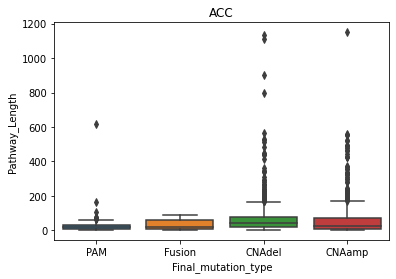

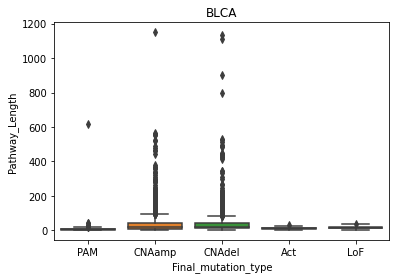

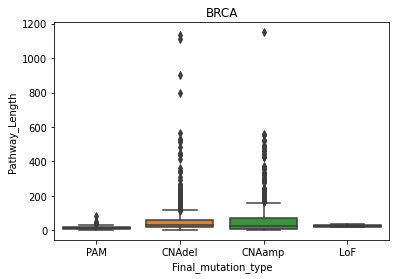

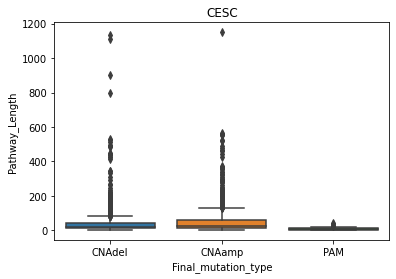

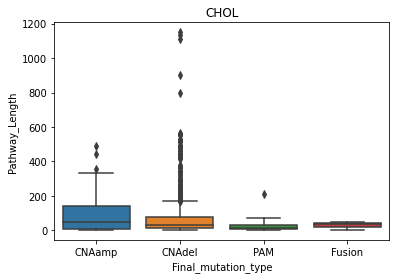

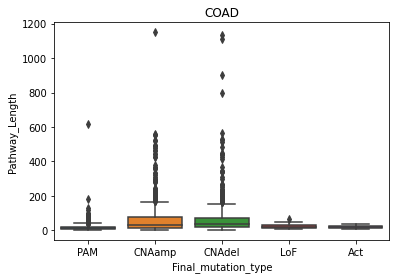

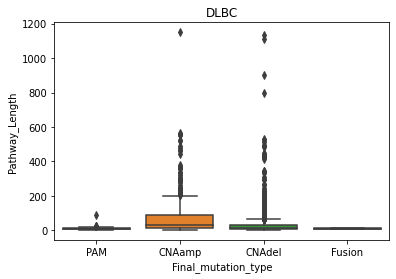

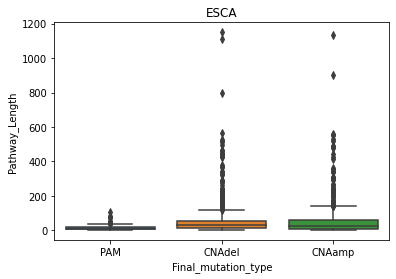

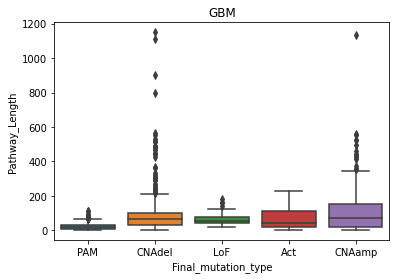

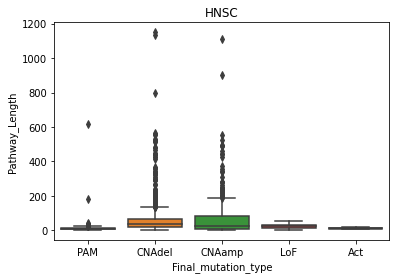

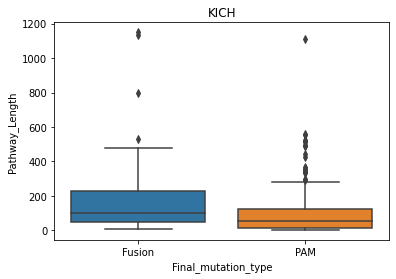

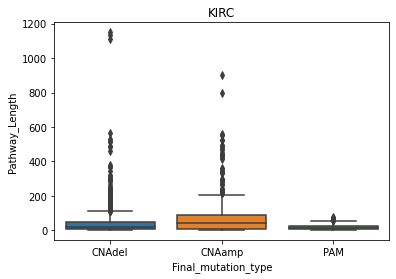

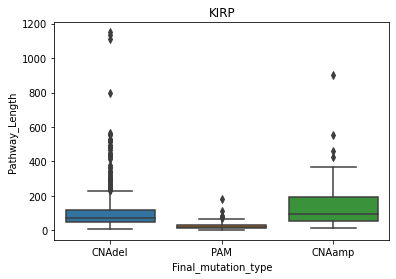

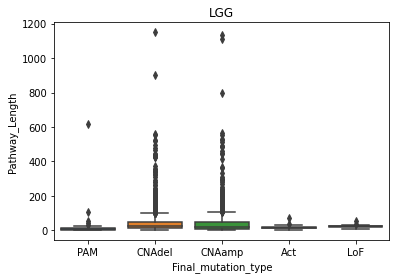

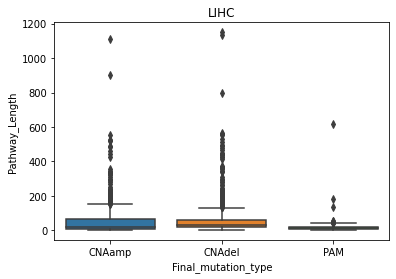

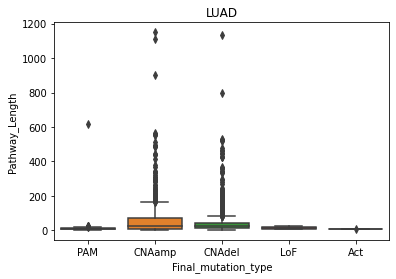

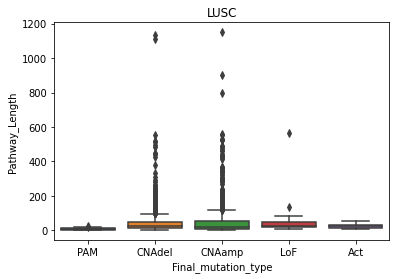

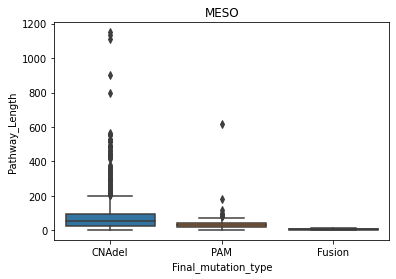

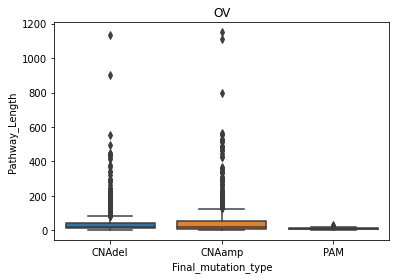

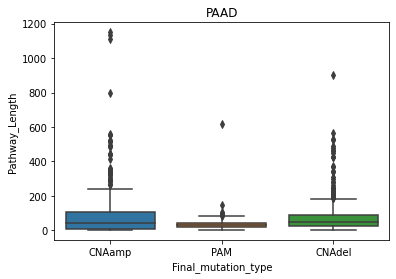

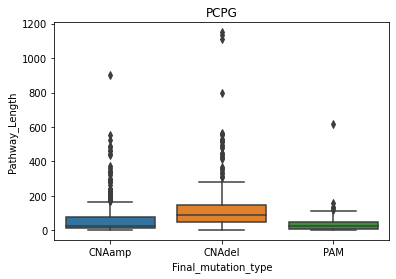

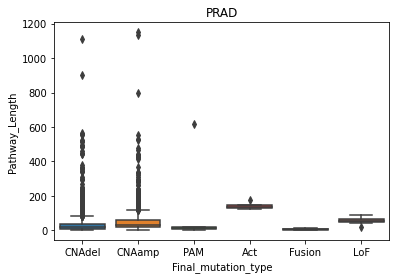

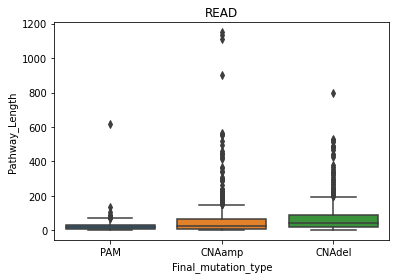

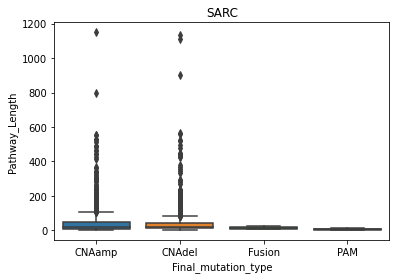

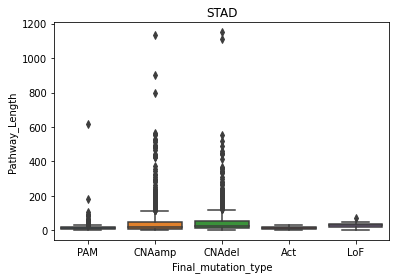

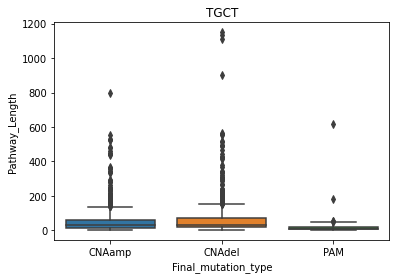

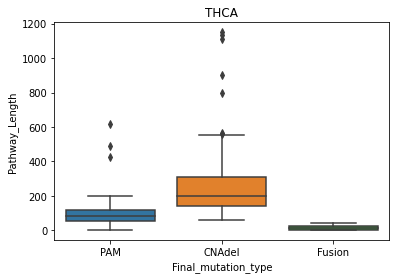

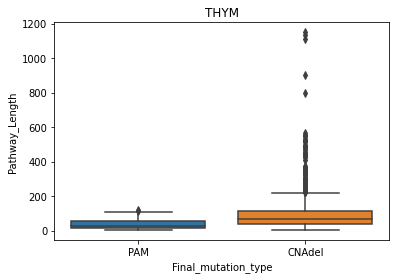

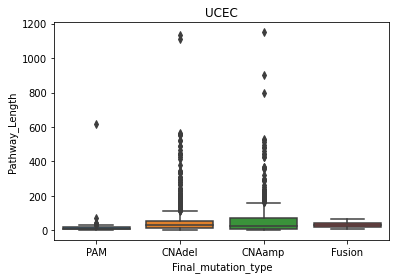

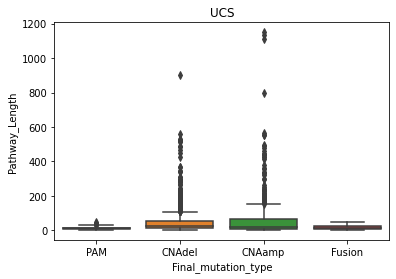

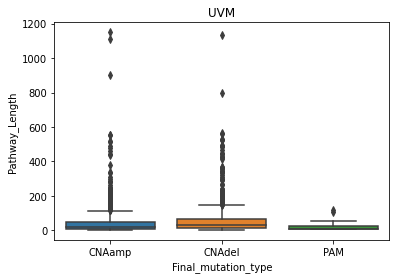

In [34]:
with PdfPages('Mutation type and Pathway length.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['Final_mutation_type'].isnull()]
    fig, ax = plt.subplots()
    sns.boxplot(data = tmp1, y = "Pathway_Length", x = 'Final_mutation_type')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

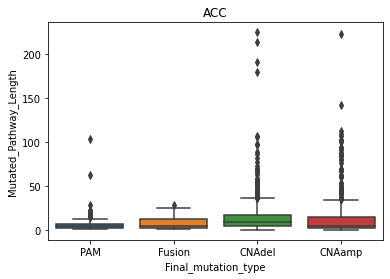

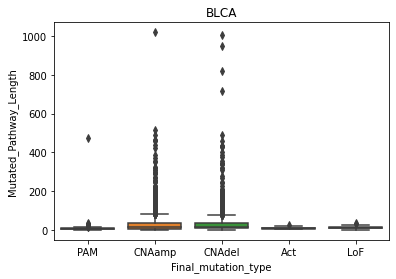

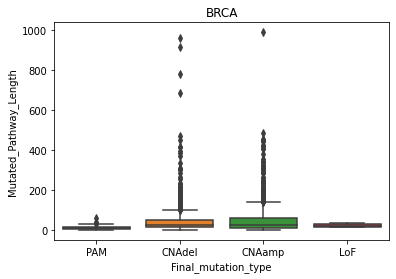

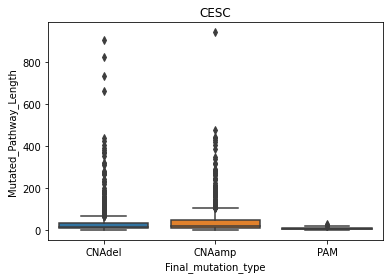

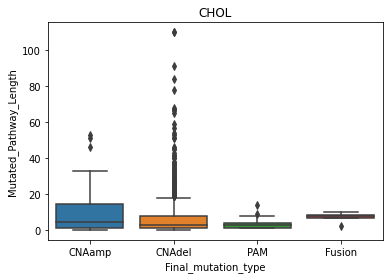

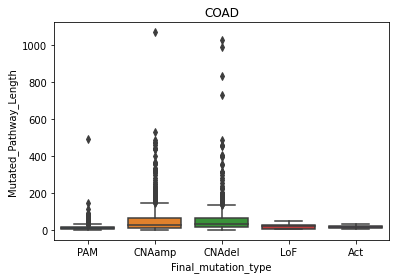

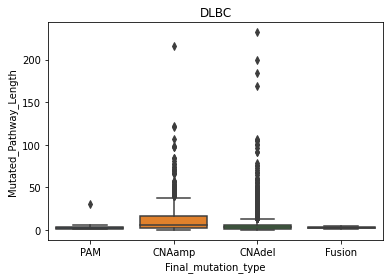

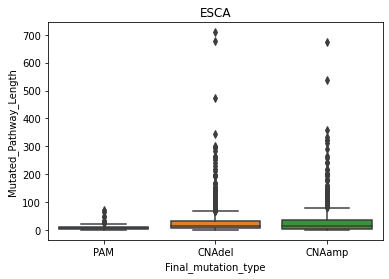

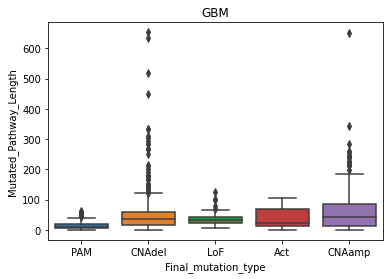

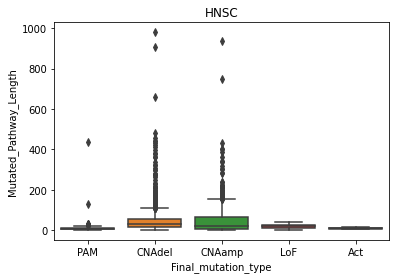

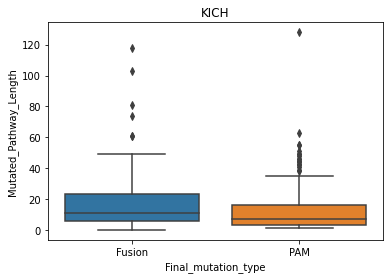

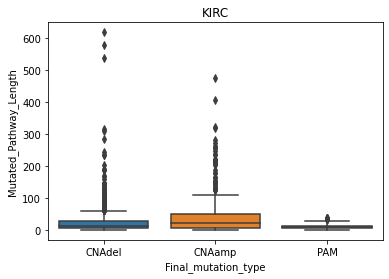

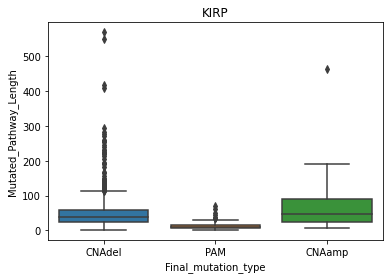

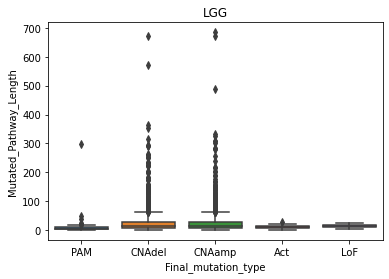

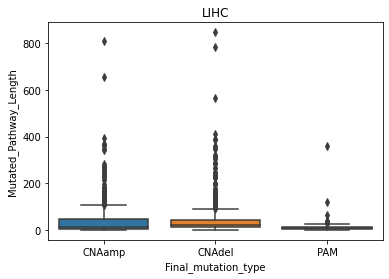

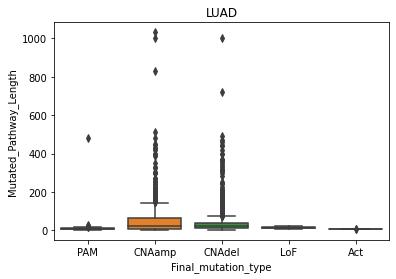

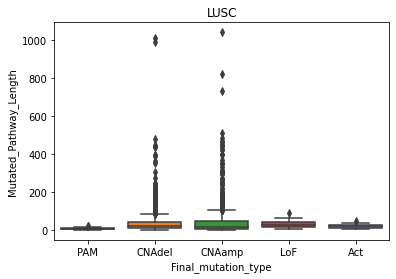

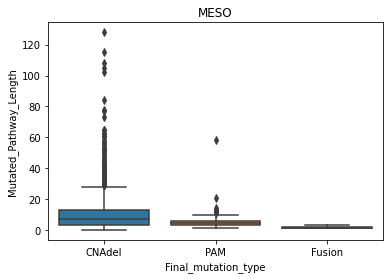

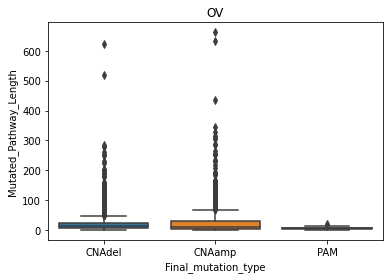

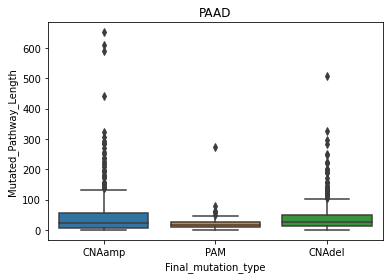

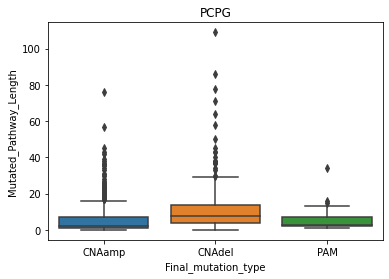

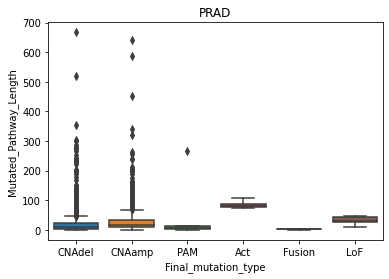

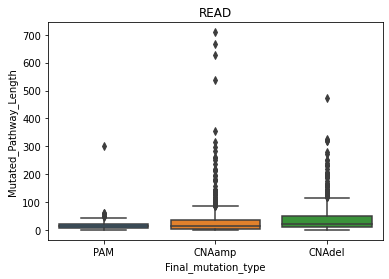

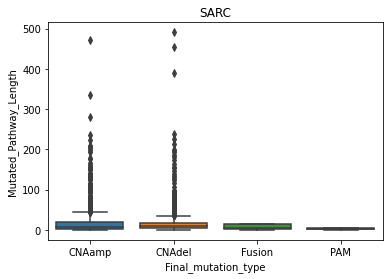

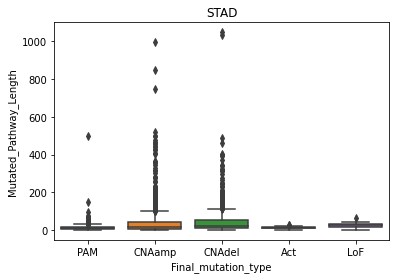

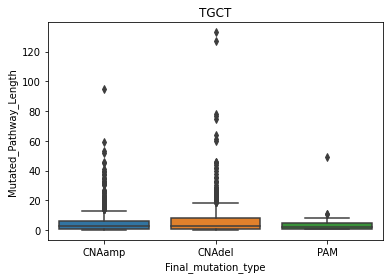

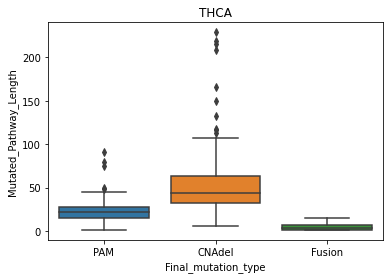

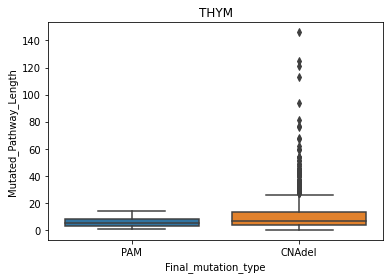

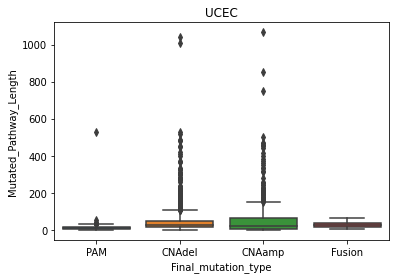

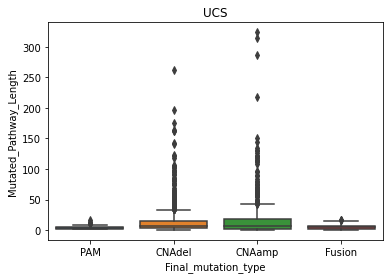

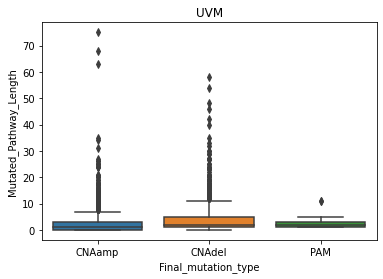

In [3]:
with PdfPages('Mutation type and Number of Mutated Tumors.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['Final_mutation_type'].isnull()]
    fig, ax = plt.subplots()
    sns.boxplot(data = tmp1, y = "Mutated_Pathway_Length", x = 'Final_mutation_type')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('Mutation type per cancer type.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['Final_mutation_type'].isnull()]
    fig, ax = plt.subplots()
    labels = ["CNAamp","CNAdel", "Act", "PAM", "LoF", "Fusion"]
    counts = {}
    zeroes = []
    for label in labels:
      counts[label] = tmp1[tmp1['Final_mutation_type']==label].size
      if (tmp1[tmp1['Final_mutation_type']==label].size > 0):
        zeroes.append(labels.index(label))
    plt.pie(np.array(list(counts.values()))[zeroes], labels = np.array(labels)[zeroes], colors = np.array(["red", "green", "blue", "orange", "purple", "yellow"])[zeroes])
    ax.set_title(tumor)
    ax.yaxis.set_visible(False)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('Mutation type and Number of amplified Tumors.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['Final_mutation_type'].isnull()]
    fig, ax = plt.subplots()
    sns.boxplot(data = tmp1, y = tmp1["Amplified_Genes"].apply(len), x = 'Final_mutation_type')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('PAM Freq and Pathway length.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['Final_freq'].isnull()]
    fig, ax = plt.subplots()
    sns.scatterplot(data = tmp1, y = "PAM_freq", x = 'Pathway_Length')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('Freq and Pathway length.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['Final_freq'].isnull()]
    fig, ax = plt.subplots()
    sns.scatterplot(data = tmp1, y = "Final_freq", x = 'Pathway_Length')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('Mutation type and Number of deleted Tumors.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['Final_mutation_type'].isnull()]
    fig, ax = plt.subplots()
    sns.boxplot(data = tmp1, y = tmp1["Deleted_Genes"].apply(len), x = 'Final_mutation_type')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [7]:
for tumor in tumors:
  tmp1 = pd.read_csv("/content/drive/MyDrive/ME/" + tumor + "ME.csv", index_col=0)
  oncomergeSummary[tumor] = oncomergeSummary[tumor].merge(right = tmp1, how = 'right', right_on = 'names', left_on = 'Pathway_Name')

In [ ]:
with PdfPages('ME and pathwaylength.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['p_value'].isnull()]
    fig, ax = plt.subplots()
    sns.scatterplot(data = tmp1, y = "Pathway_Length", x = 'p_value')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('ME and Number of tumors somatically mutated.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['p_value'].isnull()]
    fig, ax = plt.subplots()
    sns.scatterplot(data = tmp1, y = "Mutated_Pathway_Length", x = 'p_value')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('ME and pval.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['OM_empirical_p_value'].isnull()]
    fig, ax = plt.subplots()
    sns.scatterplot(data = tmp1, y = 'OM_empirical_p_value', x = 'p_value')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('Mutation type and pval.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['Final_mutation_type'].isnull()]
    fig, ax = plt.subplots()
    sns.boxplot(data = tmp1, y = "OM_empirical_p_value", x = 'Final_mutation_type')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [ ]:
with PdfPages('Mutation type and pval.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['Final_mutation_type'].isnull()]
    fig, ax = plt.subplots()
    sns.boxplot(data = tmp1, y = "p_value", x = 'Final_mutation_type')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

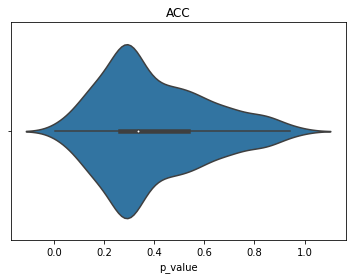

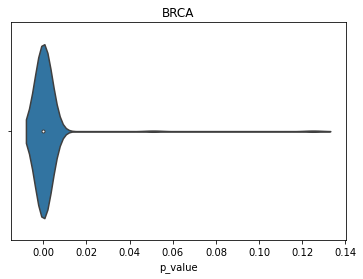

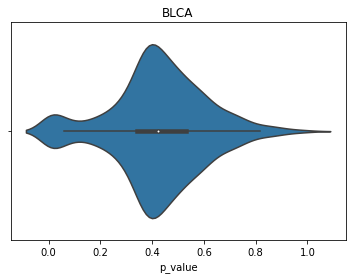

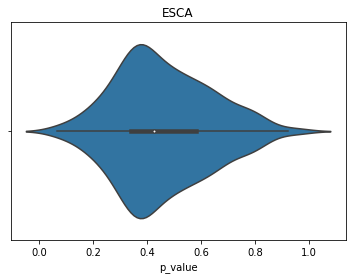

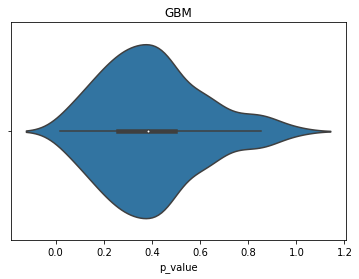

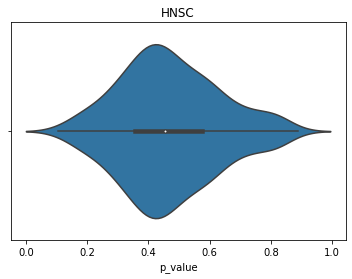

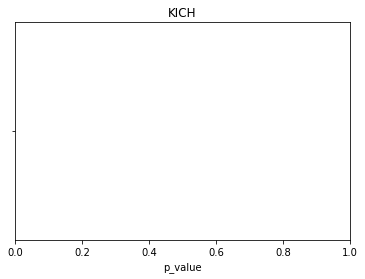

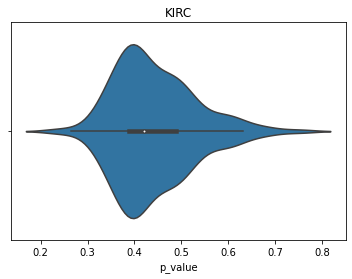

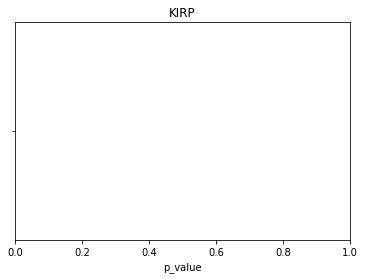

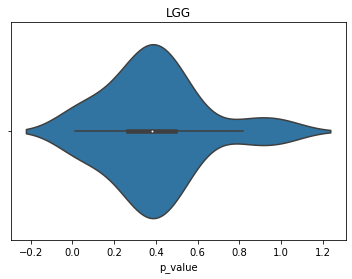

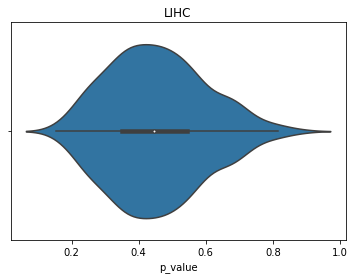

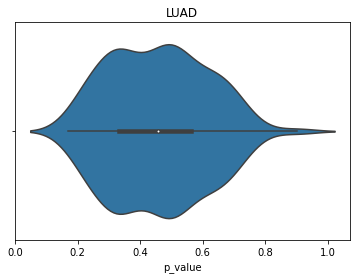

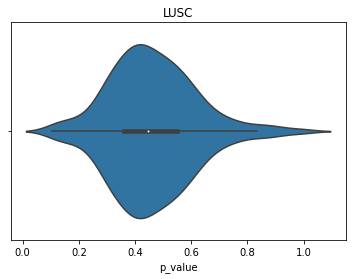

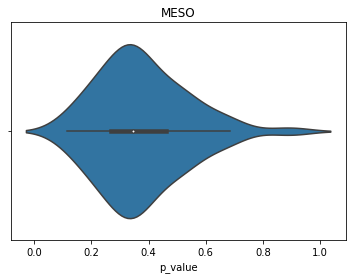

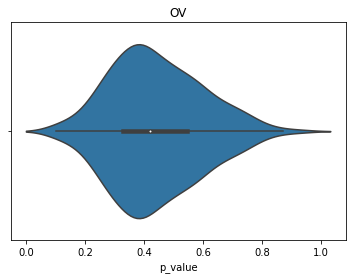

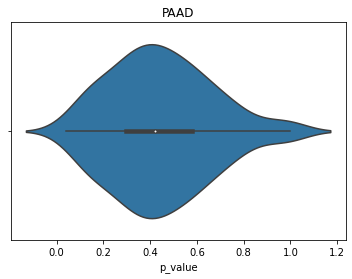

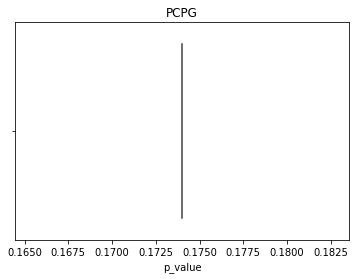

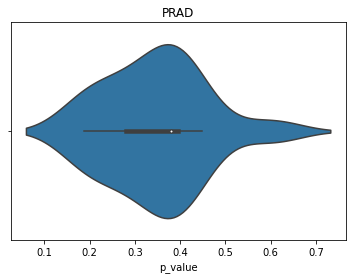

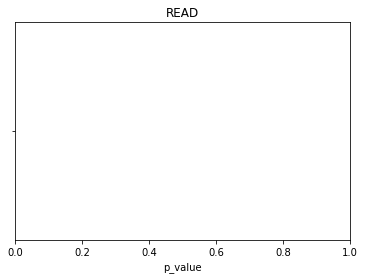

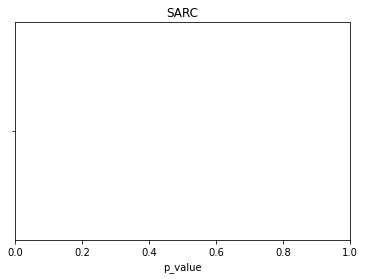

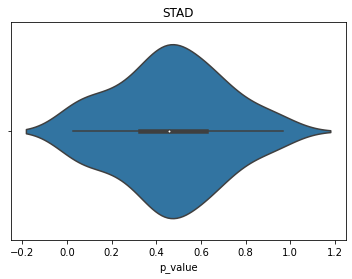

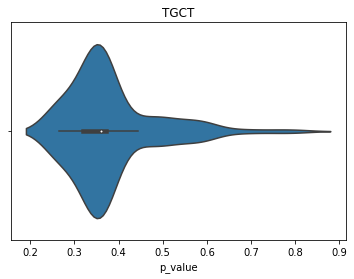

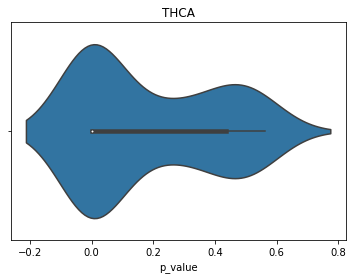

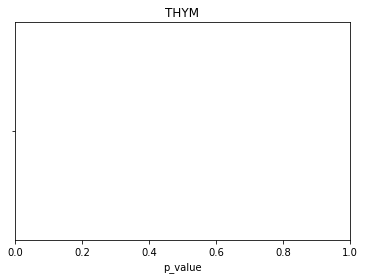

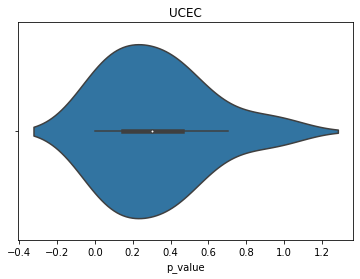

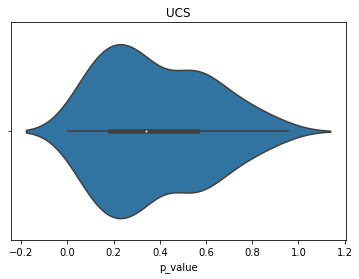

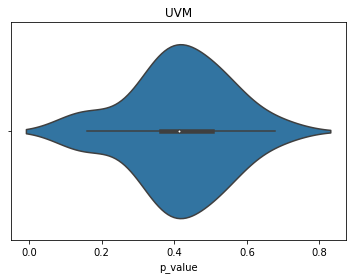

In [9]:
# somatically mutated pathway length less than 200
with PdfPages('MEviolin.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    fig, ax = plt.subplots()
    sns.violinplot(tmp1["p_value"])
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

In [27]:
for tumor in tumors:
   

In [45]:
tmp1['Final_freq']

Series([], Name: Final_freq, dtype: float64)

In [44]:
tmp1['OM_empirical_p_value']

Series([], Name: OM_empirical_p_value, dtype: float64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

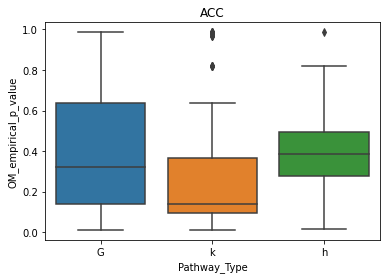

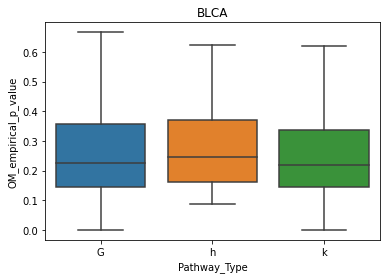

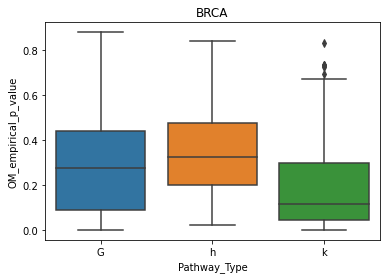

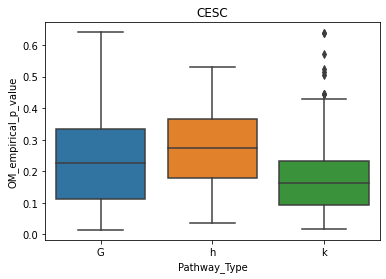

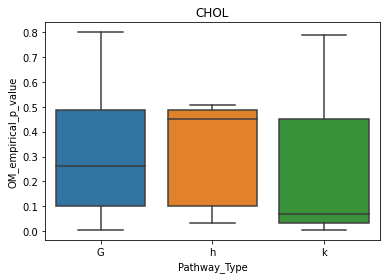

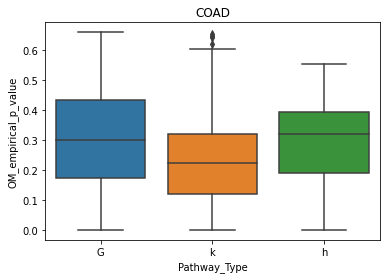

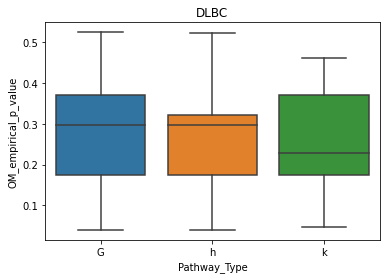

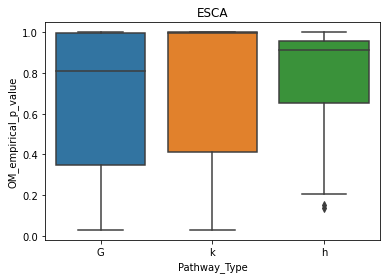

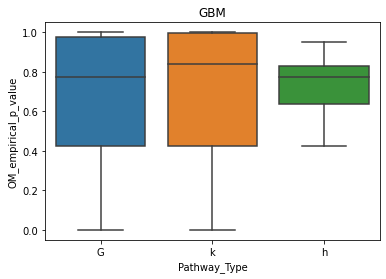

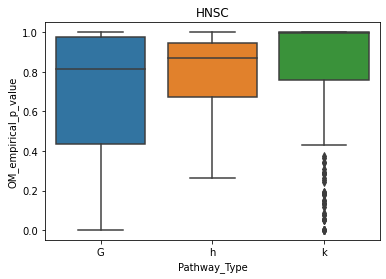

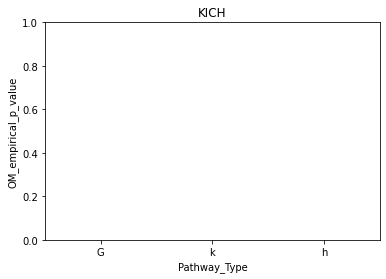

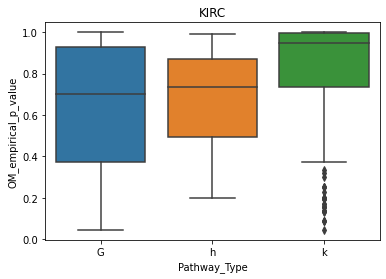

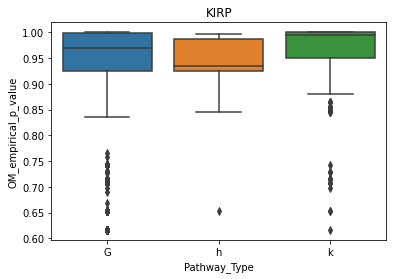

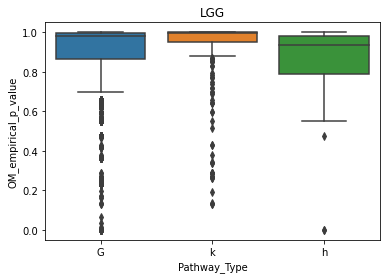

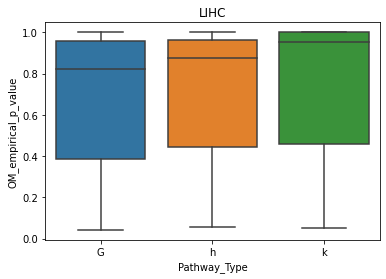

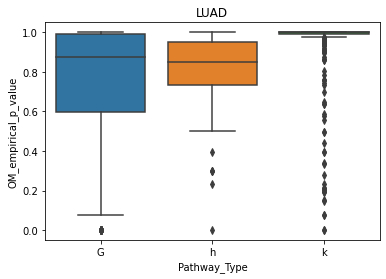

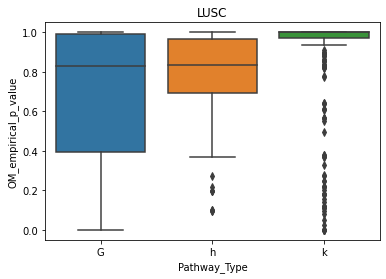

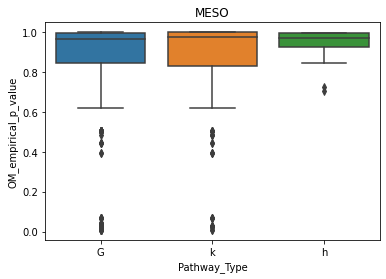

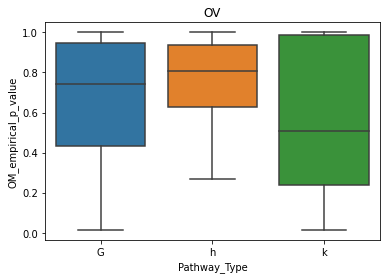

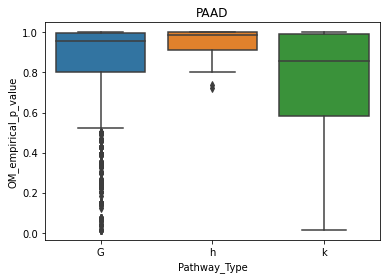

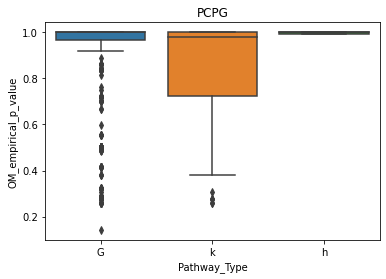

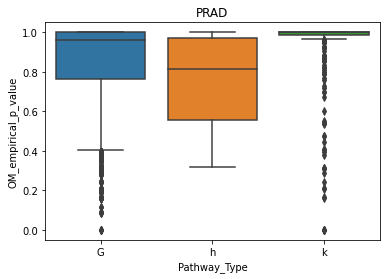

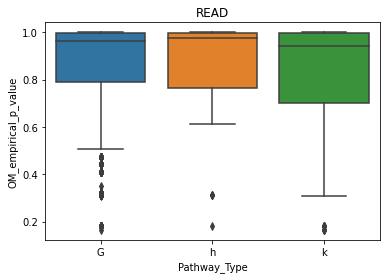

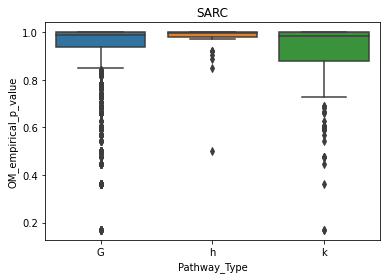

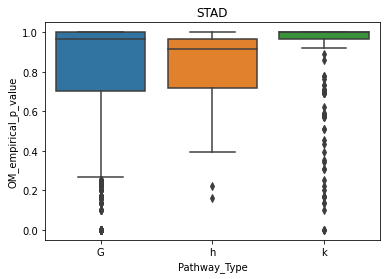

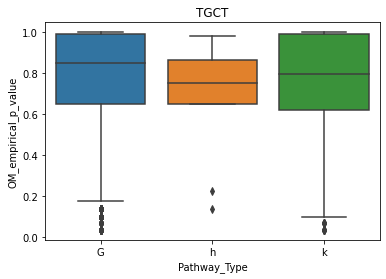

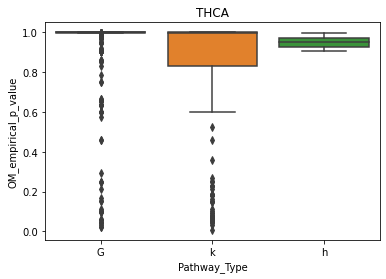

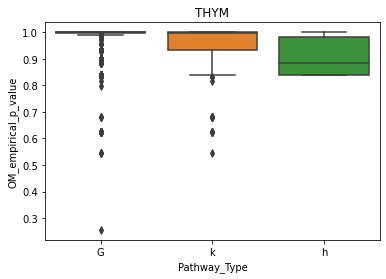

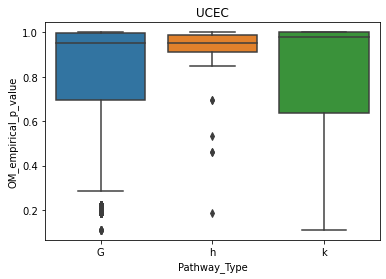

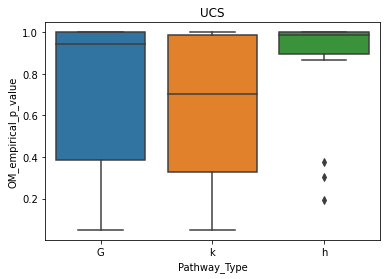

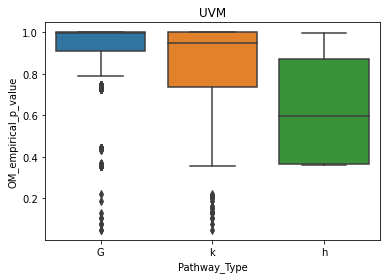

In [46]:
with PdfPages('Pathway type and p val.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    fig, ax = plt.subplots()
    sns.boxplot(data = tmp1, y ="OM_empirical_p_value", x = 'Pathway_Type')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

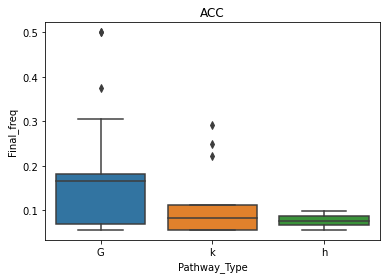

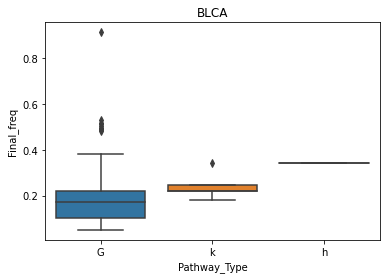

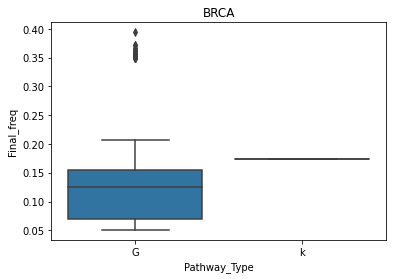

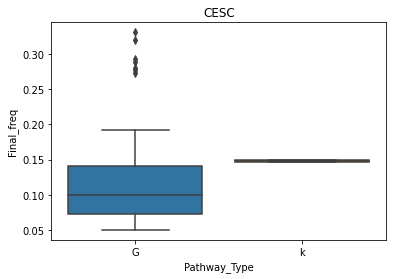

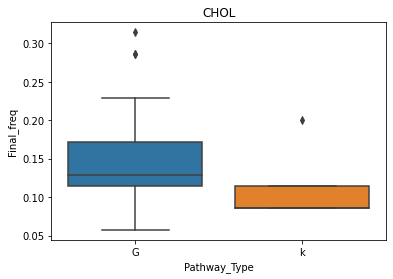

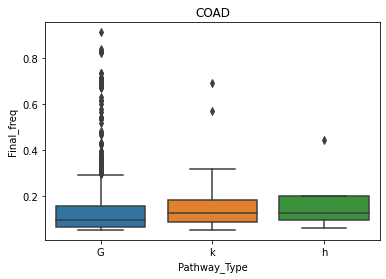

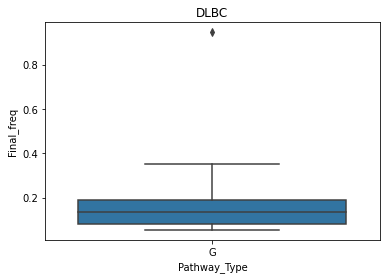

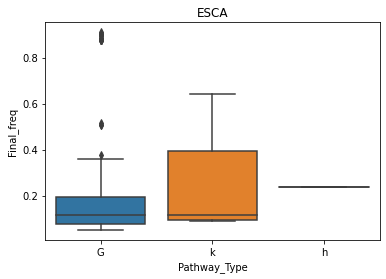

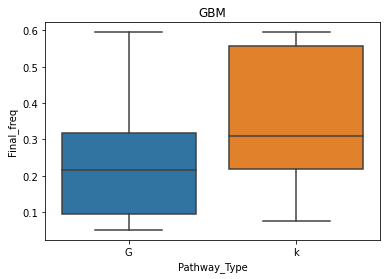

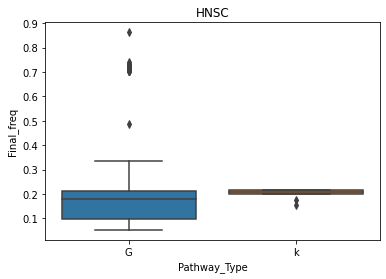

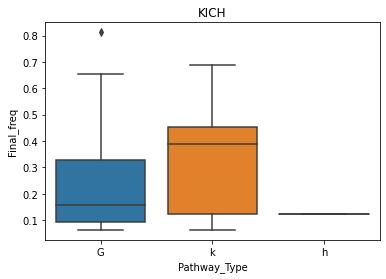

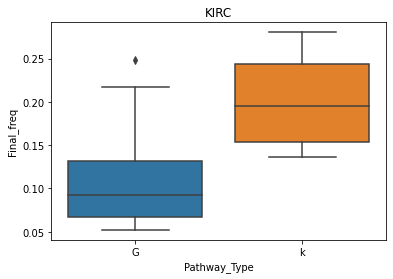

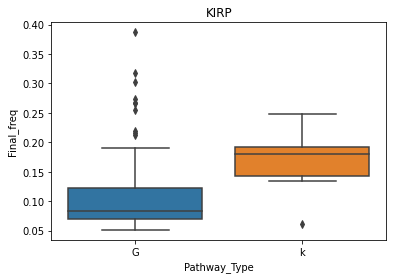

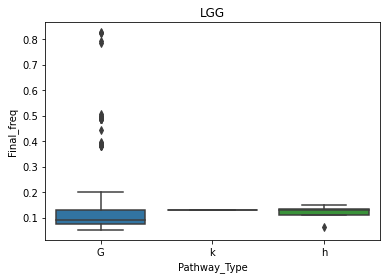

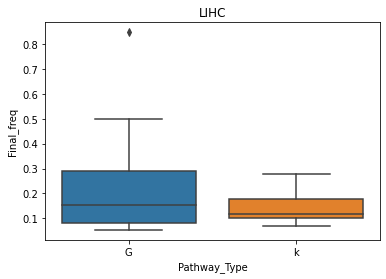

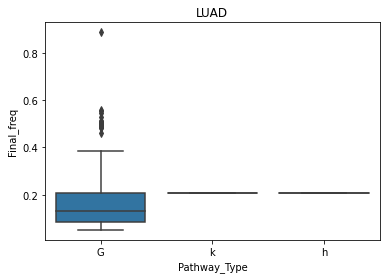

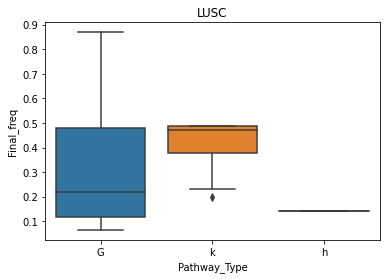

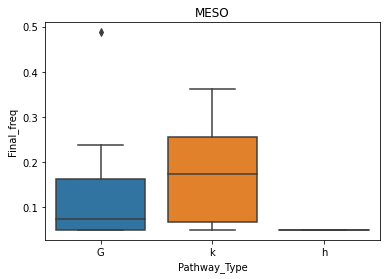

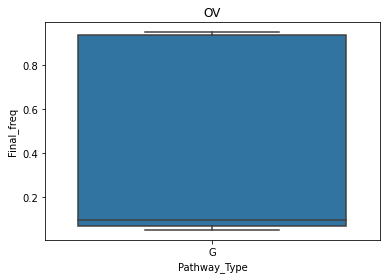

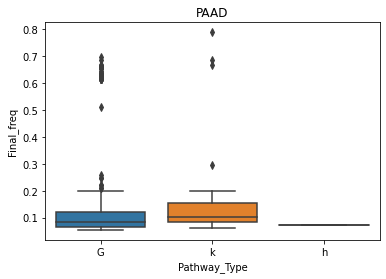

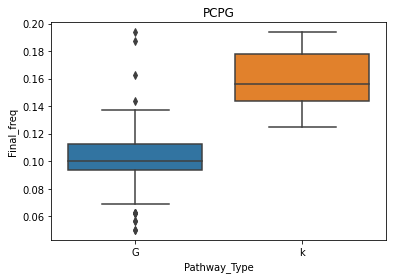

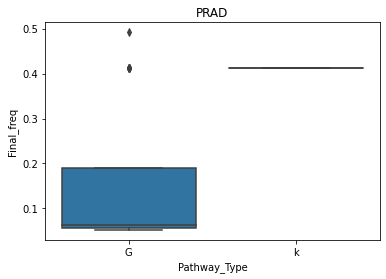

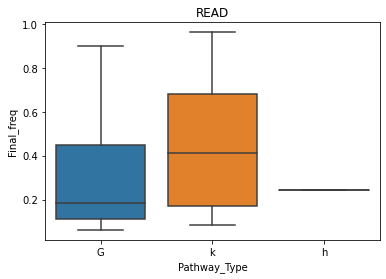

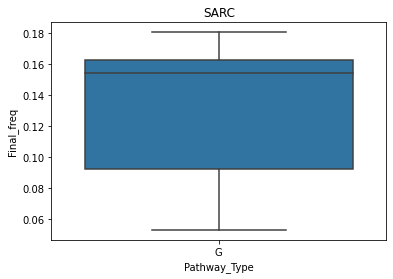

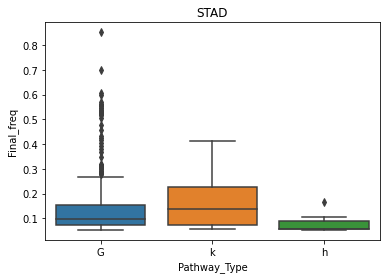

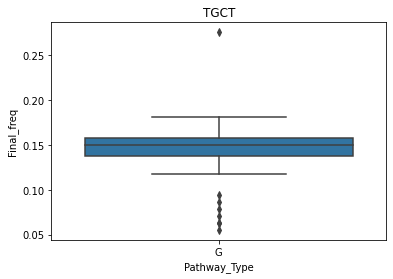

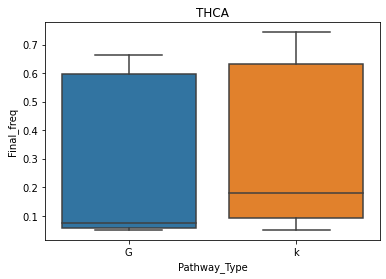

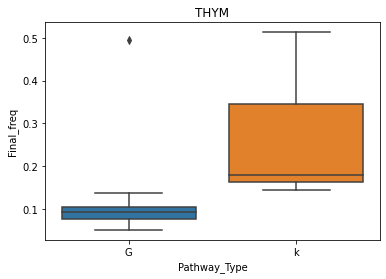

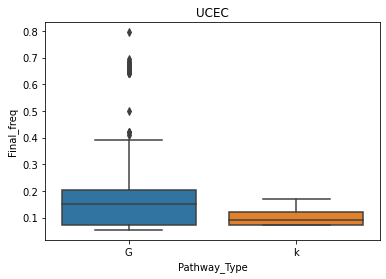

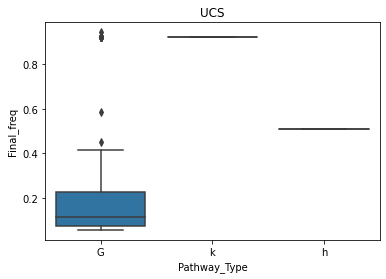

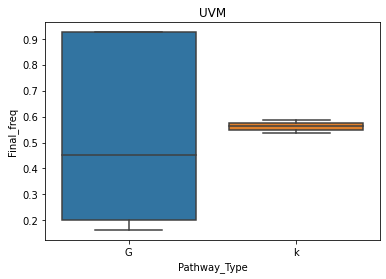

In [42]:
with PdfPages('Pathway Type and Freq.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    tmp1 = tmp1[~tmp1['Final_freq'].isnull()]
    fig, ax = plt.subplots()
    sns.boxplot(data = tmp1, y = "Final_freq", x = 'Pathway_Type')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

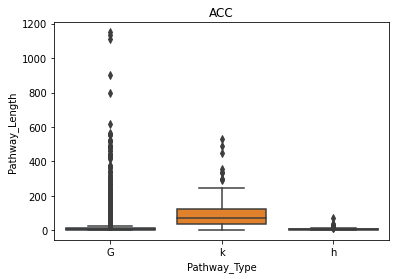

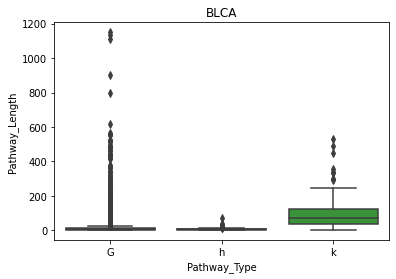

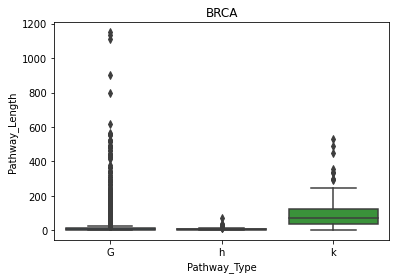

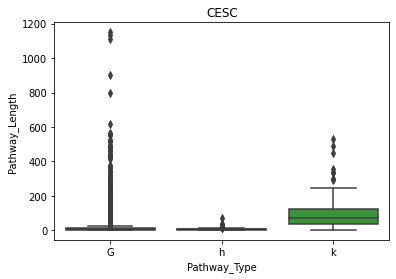

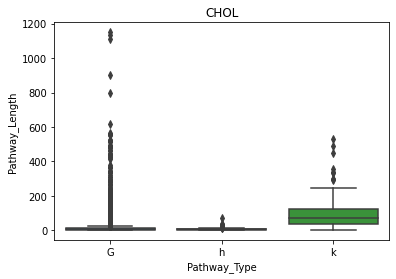

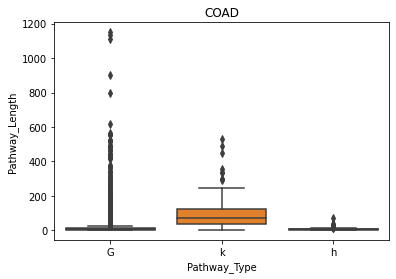

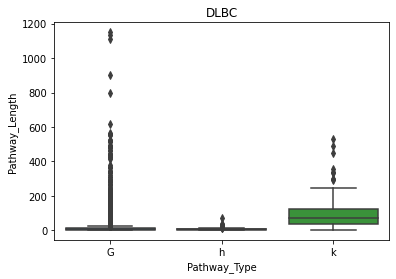

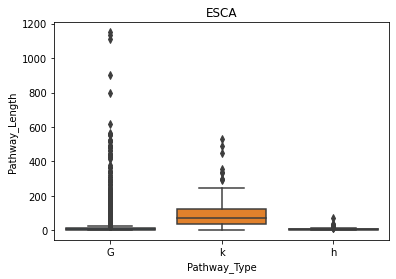

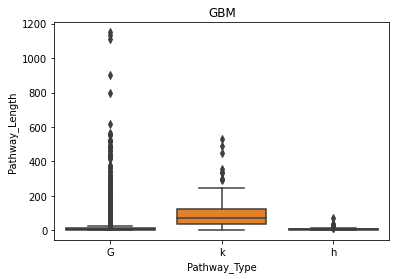

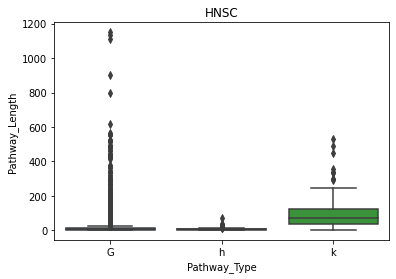

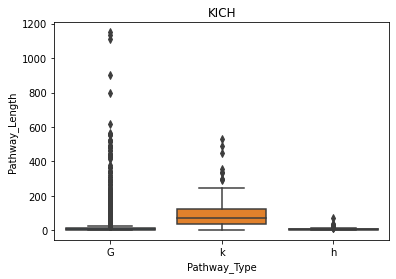

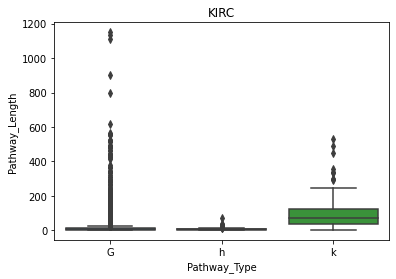

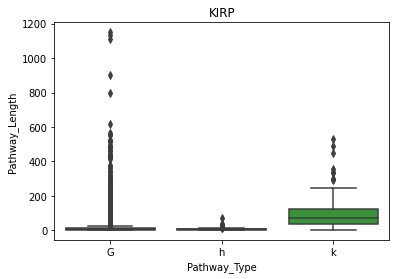

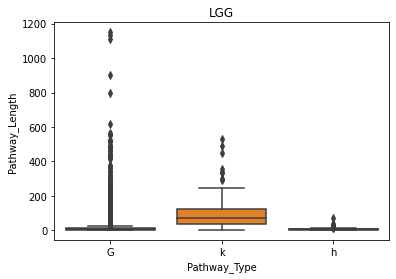

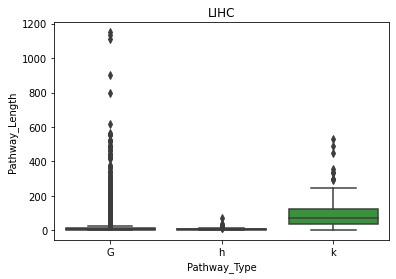

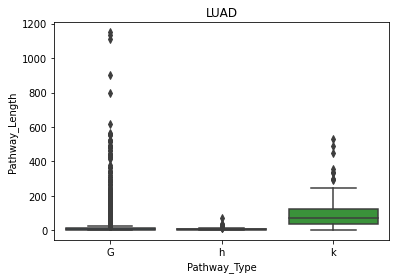

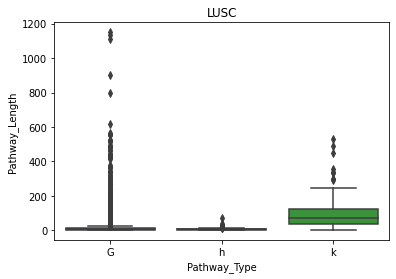

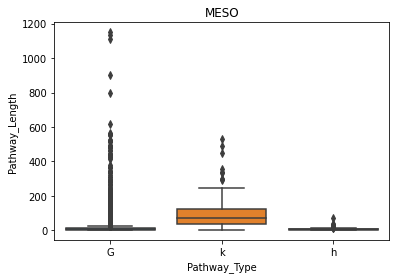

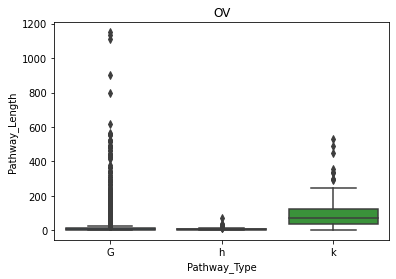

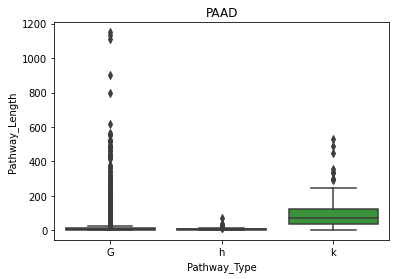

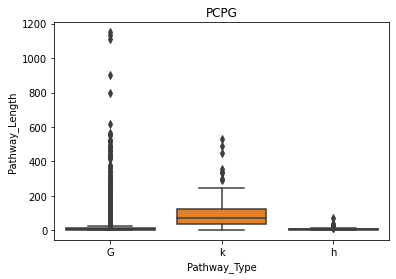

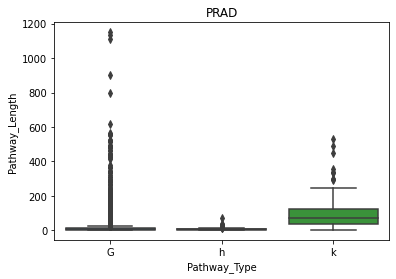

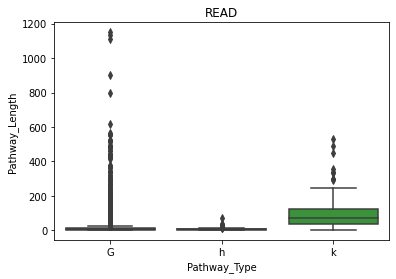

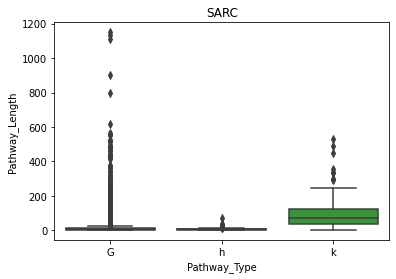

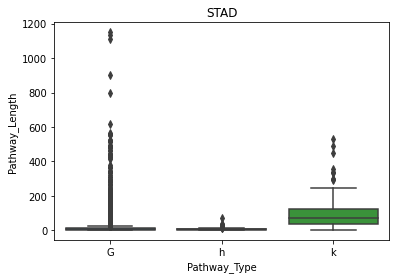

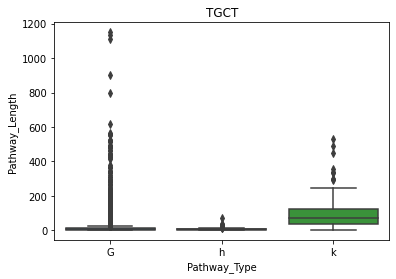

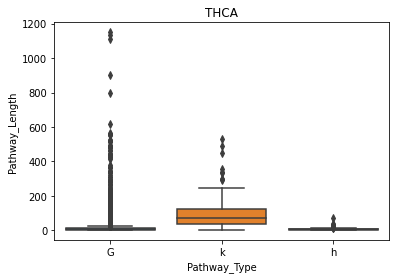

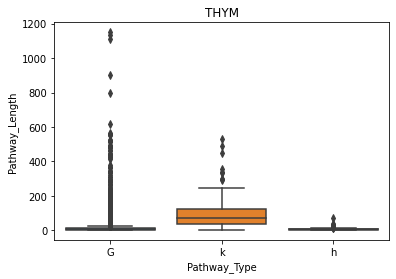

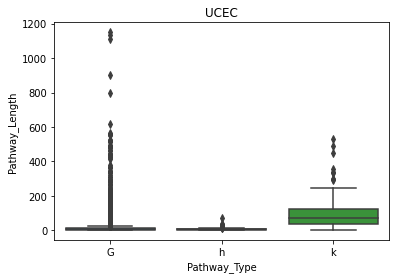

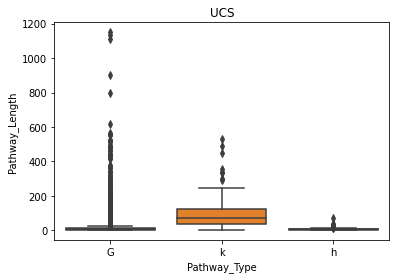

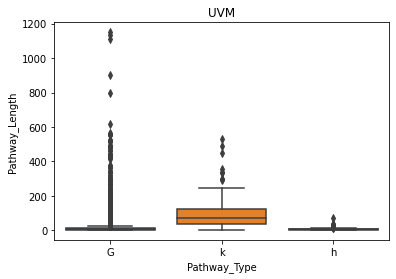

In [38]:
with PdfPages('Pathway Type and Length.pdf') as pdf_pages:
  for tumor in tumors:
    tmp1 = oncomergeSummary[tumor]
    fig, ax = plt.subplots()
    sns.boxplot(data = tmp1, y = "Pathway_Length", x = 'Pathway_Type')
    ax.set_title(tumor)
    pdf_pages.savefig( fig )